In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('health.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Critical Ranges

Glucose (mg/dL) : 40 - 250

Blood Pressure – Diastolic (mm Hg): 40 - 120

Skin Thickness (mm) : 10 - 50

Insulin (µU/mL): 5 - 400

BMI (kg/m²) : 14 - 50

Diabetes Pedigree Function: 0.0 - 2.5


In [7]:
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[cols_with_zeros] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Replace zeroes with central tendancy i.e Median

In [8]:
import numpy as np

for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Outliers

In [11]:
num = df.select_dtypes(include=["int64", "float64"]).columns
cat = df.select_dtypes(include=["object"]).columns

In [12]:
num , cat

(Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'),
 Index([], dtype='object'))

All columns are numeric

Analyse 2 categorical columns with the help of countplot

### bar plot

<Axes: xlabel='Age', ylabel='Outcome'>

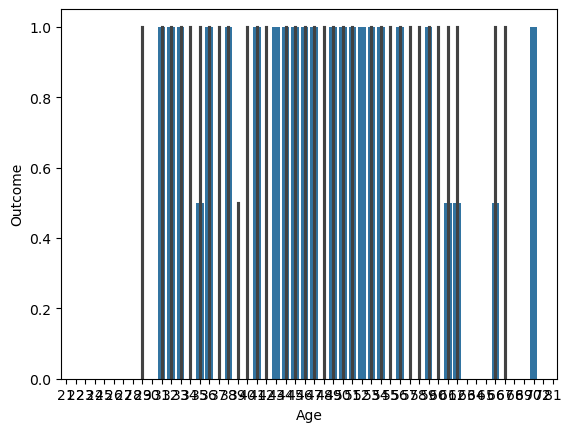

In [13]:
sns.barplot(x="Age",y="Outcome",data=df,estimator='median')

In [14]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: xlabel='Age'>

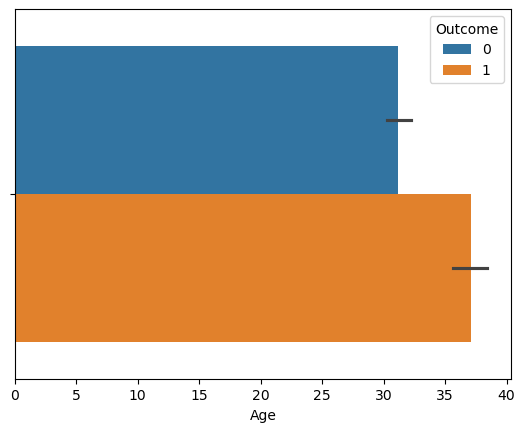

In [15]:
sns.barplot(x=df['Age'],hue=df['Outcome'],estimator='mean')

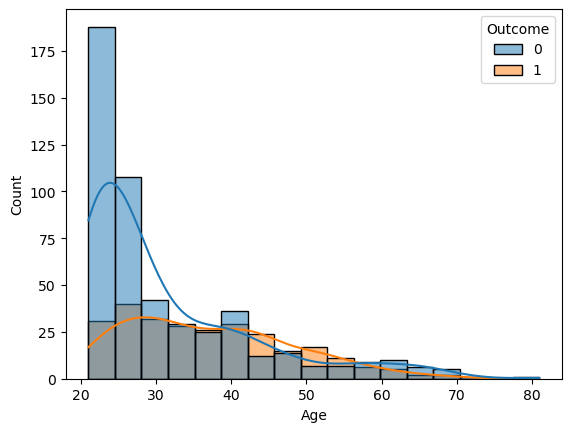

In [16]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [17]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

2. BMI and Outcome

In [18]:
df['BMI'].groupby(df['Outcome']).mean()

Outcome
0    30.885600
1    35.383582
Name: BMI, dtype: float64

<Axes: xlabel='BMI'>

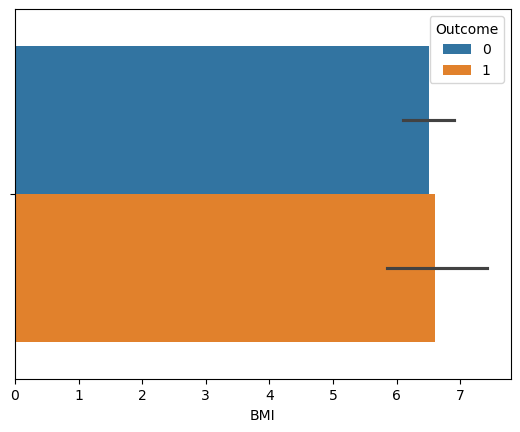

In [19]:
sns.barplot(x=df['BMI'],hue=df['Outcome'],estimator='std')

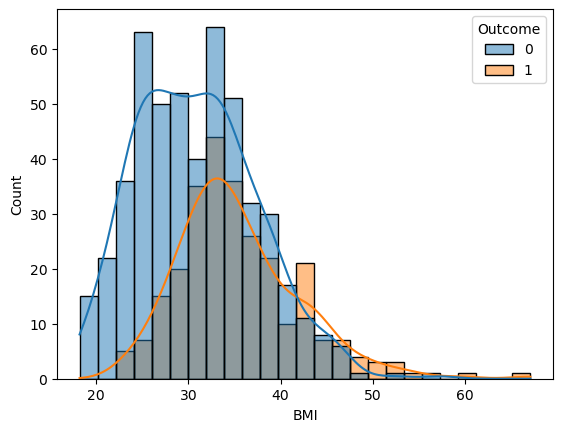

In [20]:
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)
plt.show()

In [21]:
df.BMI.value_counts()

BMI
32.3    14
32.0    13
31.6    12
31.2    12
33.3    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 247, dtype: int64

In [22]:
die_age = df['Age'][df['Outcome']==1]
nondie_age = df['Age'][df['Outcome']==0]

In [23]:
#H0 : Both data are same
#H! : Both are different

from scipy.stats import ttest_ind

stat, p = ttest_ind(die_age,nondie_age)

alpha = 0.05
if p < alpha:
    print("Reject H0, Both are different")

else:
    print("Accept H0, Both are same")

Reject H0, Both are different


This means there is effect of age column on Outcome

In [24]:
die = df['BMI'][df['Outcome']==1]
nondie = df['BMI'][df['Outcome']==0]

stat, p = ttest_ind(die,nondie)
alpha = 0.05
if p < alpha:
    print("Reject H0, Both are different")

else:
    print("Accept H0, Both are same")

Reject H0, Both are different


This means there is effect of BMI column on Outcome

3. BloodPressure and Outcome

In [25]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

<Axes: xlabel='BloodPressure'>

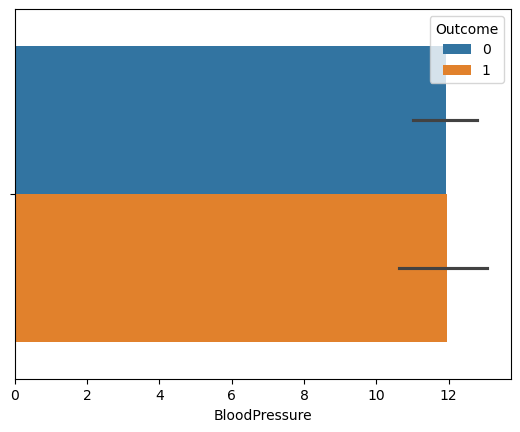

In [26]:
sns.barplot(x=df['BloodPressure'],hue=df['Outcome'],estimator='std')

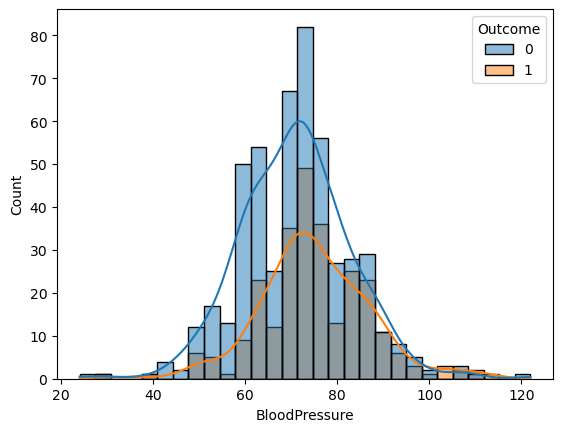

In [27]:
sns.histplot(x='BloodPressure',hue='Outcome',data=df,kde=True)
plt.show()

In [28]:
d = df['BloodPressure'][df['Outcome']==1]
n = df['BloodPressure'][df['Outcome']==0]

stat, p = ttest_ind(d,n)
alpha = 0.05
if p < alpha:
    print("Reject H0, Both are different")

else:
    print("Accept H0, Both are same")

Reject H0, Both are different


This means there is effect of BloodPressure column on Outcome

4. Insulin and Outcome

In [29]:
df['Insulin'].groupby(df['Outcome']).mean()

Outcome
0    127.792000
1    164.701493
Name: Insulin, dtype: float64

<Axes: xlabel='Insulin'>

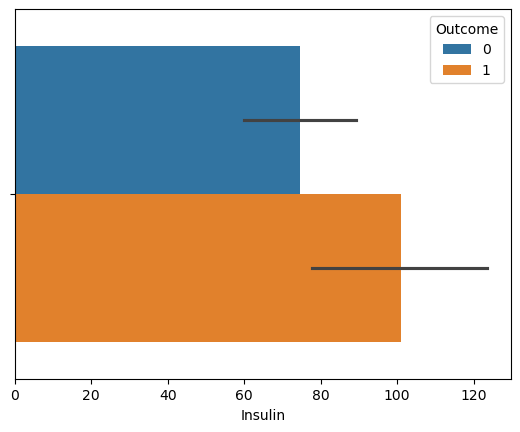

In [30]:
sns.barplot(x=df['Insulin'],hue=df['Outcome'],estimator='std')

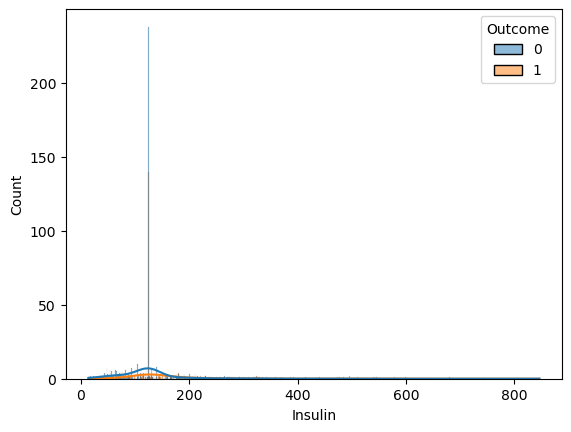

In [31]:
sns.histplot(x='Insulin',hue='Outcome',data=df,kde=True)
plt.show()

In [32]:
d = df['Insulin'][df['Outcome']==1]
n = df['Insulin'][df['Outcome']==0]

stat, p = ttest_ind(d,n)
alpha = 0.05
if p < alpha:
    print("Reject H0, Both are different")

else:
    print("Accept H0, Both are same")

Reject H0, Both are different


This means there is effect of Insulin column on Outcome

5. Diabetes Pedigree function and Outcome

In [33]:
df['DiabetesPedigreeFunction'].groupby(df['Outcome']).mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction'>

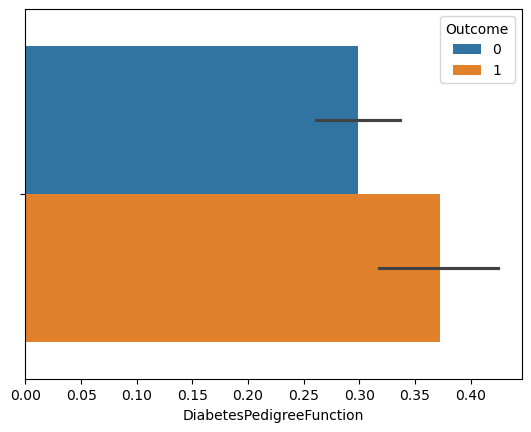

In [34]:
sns.barplot(x=df['DiabetesPedigreeFunction'],hue=df['Outcome'],estimator='std')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

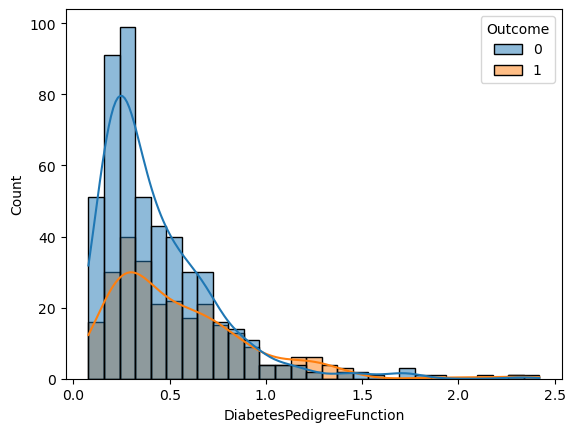

In [35]:
sns.histplot(data=df, x="DiabetesPedigreeFunction", hue="Outcome", kde=True)

In [36]:
d = df['DiabetesPedigreeFunction'][df['Outcome']==1]
n = df['DiabetesPedigreeFunction'][df['Outcome']==0]

stat, p = ttest_ind(d,n)
alpha = 0.05
if p < alpha:
    print("Reject H0, Both are different")

else:
    print("Accept H0, Both are same")

Reject H0, Both are different


This means that DiabetesPedigreeFunction column has an effect on Outcome

In [37]:
def iqr_cap(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


In [38]:
cols_to_cap = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

for col in cols_to_cap:
    iqr_cap(df, col)


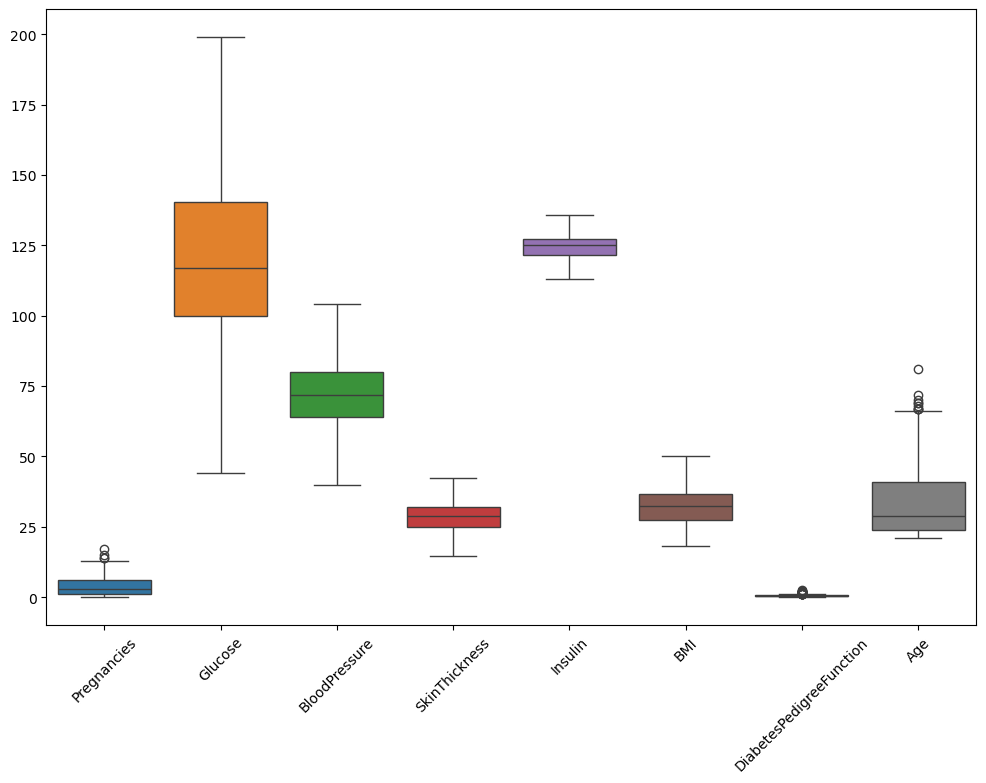

In [39]:
#Boxplot

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop("Outcome", axis=1))
plt.xticks(rotation=45)
plt.show()

In [40]:
#Scaling - Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred_train = clf.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score

#training accuracy
accuracy_score(y_train,y_pred_train)

0.7638436482084691

In [51]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score

confusion_matrix(y_train,y_pred_train)

array([[351,  49],
       [ 96, 118]])

In [52]:
y_pred_test = clf.predict(X_test)

In [53]:
#testing accuracy
accuracy_score(y_test,y_pred_test)

0.7792207792207793

In [54]:
confusion_matrix(y_test,y_pred_test)

array([[92,  8],
       [26, 28]])

To reduce the effect of false negative - use recall score

- [[TP TN]

   [FP FN]]

- person **diabetic** actual **diabetic** (TP) (1 1)
- person **non diabetic** actual **non diabetic** (TN) (0 0)
- person **diabetic** actual **non diabetic** (FP) (1 0)
- person **non diabetic** actual **diabetic** (FN) (0 1)

- 0 => Negative(Diabetic) ||
1 => Positive(Non-Diabetic)
---
1.  Accuracy =(TP+TN)/(TP+TN+FP+FN).
    - *the total no.of correct classifications divided by the total no.of classifications*

2. Recall = (TP)/(TP+FN)
    - *From the total +ve results how many +ve were correctly predicted by the model.*

3. Precision Score = TP /(TP+FP)
    - *it is a measure of amongst all the +ve predictions.how many of them were actually +ve*

4. F1 score = 2*(Precision * Recall) / (Precision + Recall)
    - *It is the harmonic mean.*
    - *It is used to balance Precision and Recall, showing the trade-off between them.*


---

In [57]:
precision_score(y_test,y_pred_test)

0.7777777777777778

In [58]:
recall_score(y_test,y_pred_test)

0.5185185185185185

### Specificity or True Negative Rate
How specific the model is while predicting true negatives

specificity = TN / (TN + FP)

### ROC (Receiver Operator Characterisitic)



In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [77]:
X_test.shape

(154, 8)

In [84]:
y_prob = clf.predict_proba(X_test)[:,1]   #probability for positive class
y_prob

array([0.28268219, 0.09592267, 0.02652996, 0.1595158 , 0.27242533,
       0.36430884, 0.07601281, 0.96708908, 0.90640391, 0.21541956,
       0.33123257, 0.17933994, 0.18514342, 0.28240771, 0.71049115,
       0.06926409, 0.78790845, 0.07941953, 0.6499371 , 0.44779413,
       0.15485459, 0.2056527 , 0.77188832, 0.19798328, 0.62361463,
       0.74090103, 0.14439604, 0.48131104, 0.88156051, 0.16649032,
       0.10602175, 0.48722108, 0.19993077, 0.06753445, 0.03560564,
       0.18357528, 0.28978986, 0.91866379, 0.33460415, 0.17610711,
       0.24175901, 0.53844844, 0.26444429, 0.12412089, 0.15962713,
       0.18726676, 0.23619167, 0.34317932, 0.83163423, 0.16358948,
       0.41349181, 0.09952386, 0.48390496, 0.24327777, 0.70888921,
       0.07120413, 0.34428475, 0.3895643 , 0.12262548, 0.77289846,
       0.0916886 , 0.13140691, 0.36144016, 0.16593335, 0.22205133,
       0.12562459, 0.3030663 , 0.28054452, 0.2301585 , 0.41721763,
       0.04493513, 0.63752466, 0.14856239, 0.23920583, 0.14296

In [81]:
fpr , tpr, thresholds = roc_curve(y_test, y_prob)

In [82]:
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

AUC Score: 0.8394444444444444


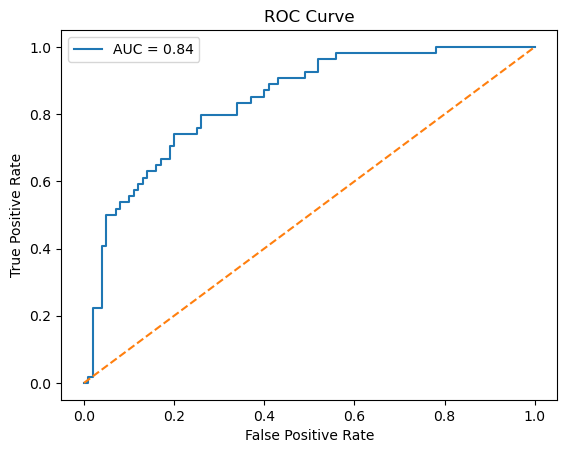

In [83]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1], linestyle='--') # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

This 0.84 is the area under curve